# Solution

## First Question

$$ {\huge\fbox{4,5}} $$


## Second Question
$$ {\huge\boxed{+\infty}} $$


## Third Question
$$ {\huge\fbox{14}} $$


# [Justification]()

## [First question]()

$$ x = average\ number\ to\ reach\ the\ border\ from\ (0,0) $$
$$ y = average\ number\ to\ reach\ the\ border\ from\  (-1,0),(1,0),(0,1)(0,-1) $$
$$ x = 2 + \frac{1}{4}*x + \frac{1}{2}*y $$
$$ y = 2 + \frac{1}{6}*x $$



## [Second question]()

$$ x_n = average\ number\ to\ reach\ the\ border\ from\ (0,0)\ to\ a\ diagonal\ that\ is\ n\ lenght\ far\ away $$
$$ x_n = \frac{1}{2}*1 + \frac{1}{2}*x_(n-1)  $$
We are looking for $x_1$ and clearly $\lim_{n \to \infty} x_n = +\infty$
Then we find by reccurence $x_1= +\infty$

## [Third question]()

Look at the code

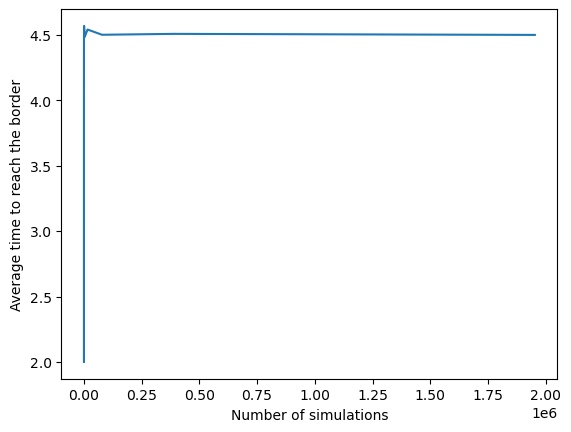

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

def ant_walk():
    (x, y) = 0, 0
    Nbr_seconds = 0
    while abs(x)< 2 and abs(y)< 2:
        # You choose (1,0) or (0,1) or (-1,0) or (0,-1) with equal probability@
        moove_ant = random.choice([(1,0),(0,1),(-1,0),(0,-1)])
        (x, y) = (x + moove_ant[0], y + moove_ant[1])
        Nbr_seconds += 1
    yield Nbr_seconds

# We simulate 1000 times the ant walk, and we compute the average@
nbr_simulations = [5**i for i in range(10)]
time_to_reach_border = []

for n in nbr_simulations:
    nbr_seconds = 0
    for _ in range(n):
        nbr_seconds += next(ant_walk())
    time_to_reach_border.append(nbr_seconds/n)

# We plot the results@
plt.plot(nbr_simulations, time_to_reach_border)
plt.xlabel('Number of simulations')
plt.ylabel('Average time to reach the border')
plt.show()

In [2]:
def ant_walk_diagonal():
    (x, y) = 0, 0
    Nbr_seconds = 0
    path=[(0,0)]
    while x + y < 1:
        # You choose (1,0) or (0,1) or (-1,0) or (0,-1) with equal probability@
        moove_ant = random.choice([(1,0),(0,1),(-1,0),(0,-1)])
        (x, y) = (x + moove_ant[0], y + moove_ant[1])
        Nbr_seconds += 1
        path.append((x,y))
    return Nbr_seconds, path

# for _ in range(10):
#     #nbr_seconds, path = next(ant_walk_diagonal())
#     # # plot the path for each simulation@
#     # plt.figure()
#     # plt.plot([1, 0], [0, 1], color='red', linewidth=3)

#     # plt.plot([x for (x, y) in path], [y for (x, y) in path])
#     # plt.title('Number of seconds to reach the border: {}'.format(nbr_seconds))
    
#     # plt.show()




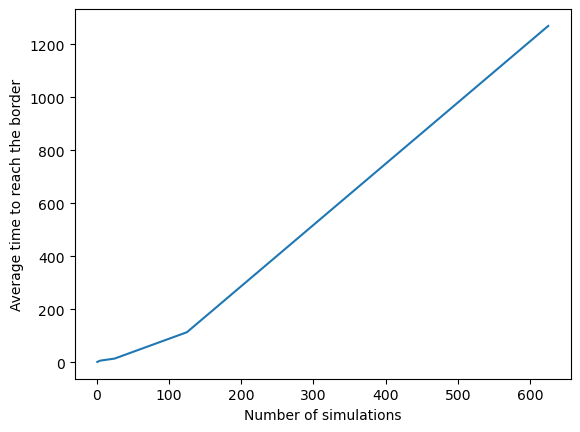

In [4]:
# We simulate 1000 times the ant walk, and we compute the average
nbr_simulations = [5**i for i in range(5)]
time_to_reach_border = []

for n in nbr_simulations:
    nbr_seconds = 0
    for _ in range(n):
        nbr_seconds += ant_walk_diagonal()[0]
    time_to_reach_border.append(nbr_seconds/n)

# We plot the results@
plt.plot(nbr_simulations, time_to_reach_border)
plt.xlabel('Number of simulations')
plt.ylabel('Average time to reach the border')
plt.show()

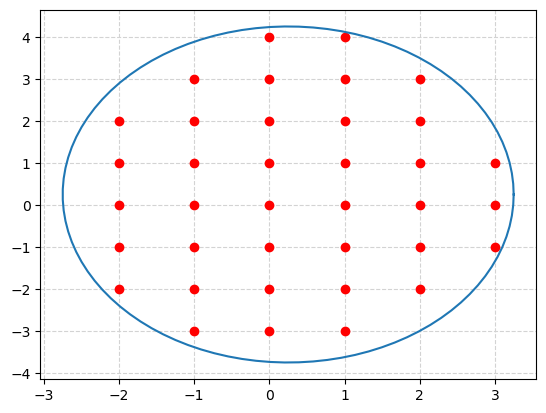

In [5]:
import matplotlib.pyplot as plt
from math import pi

# Set up the plot
fig, ax = plt.subplots()

# Set the locations of the tick marks
the_integer_point = []
for i in range(-10,10):
    for j in range(-10,10):
        if ((i-0.25)/3.0)**2 + ((j-0.25)/4.0)**2 < 1:
            the_integer_point.append((i,j))
plt.plot([x for (x, y) in the_integer_point], [y for (x, y) in the_integer_point], 'ro')

u=0.25     #x-position of the center
v=0.25   #y-position of the center
a=3.    #radius on the x-axis
b=4   #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()




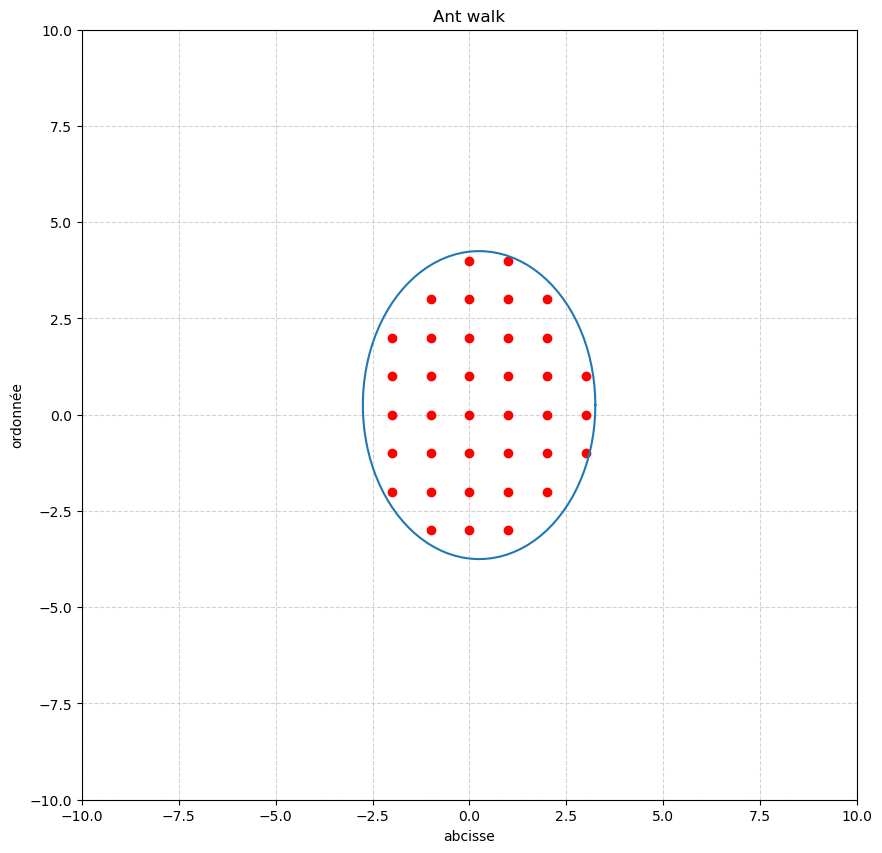

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('abcisse')
ax.set_ylabel('ordonnée')
ax.set_title('Ant walk')
line, = ax.plot([], [], 'b', lw=2)  
plt.plot([x for (x, y) in the_integer_point], [y for (x, y) in the_integer_point], 'ro')
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')



In [7]:
def ant_walk_elliptic():
    (x, y) = 0, 0
    Nbr_seconds = 0
    path=[(0,0)]
    while ((x-0.25)/3.0)**2 + ((y-0.25)/4.0)**2 < 1:
        # You choose (1,0) or (0,1) or (-1,0) or (0,-1) with equal probability@
        moove_ant = random.choice([(1,0),(0,1),(-1,0),(0,-1)])
        (x, y) = (x + moove_ant[0], y + moove_ant[1])
        Nbr_seconds += 1
        path.append((x,y))
    return Nbr_seconds, path

In [8]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# _ , path = ant_walk_diagonal()
_ , path = ant_walk_elliptic()
def animate(i):
    x = [x for (x, y) in path[:i]]
    y = [y for (x, y) in path[:i]]
    line.set_data(x, y)
    return line,

print(len(path))

43


In [9]:
anim = FuncAnimation(fig, animate, frames=len(path)+1, interval=500, blit=True)

In [10]:
HTML(anim.to_html5_video())

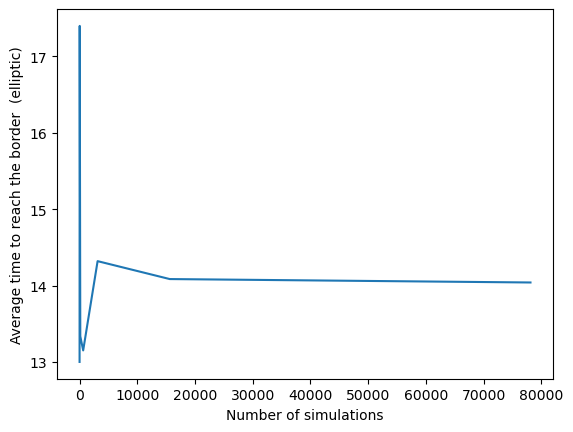

In [13]:
#Now we plot the average time to reach the border for different number of simulations@
# We simulate 1000 times the ant_walk_elliptic, and we compute the average@
nbr_simulations = [5**i for i in range(8)]
time_to_reach_border = []

for n in nbr_simulations:
    nbr_seconds = 0
    for _ in range(n):
        nbr_seconds += ant_walk_elliptic()[0]
    time_to_reach_border.append(nbr_seconds/n)

# We plot the results
plt.plot(nbr_simulations, time_to_reach_border)
plt.xlabel('Number of simulations')
plt.ylabel('Average time to reach the border  (elliptic)')

plt.show()

